In [108]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree,svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [109]:
df = pd.read_csv('../data/students_performance_preprocessed.csv')
df.drop(columns = 'Unnamed: 0',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   gender_male                                    1000 non-null   int64
 4   race/ethnicity_group B                         1000 non-null   int64
 5   race/ethnicity_group C                         1000 non-null   int64
 6   race/ethnicity_group D                         1000 non-null   int64
 7   race/ethnicity_group E                         1000 non-null   int64
 8   parental level of education_bachelor's degree  1000 non-null   int64
 9   parental level of education_high school        1000 non-null   int64
 10  p

In [110]:
df.head(10)

math score  reading score  writing score  gender_male  \
0          72             72             74            0   
1          69             90             88            0   
2          90             95             93            0   
3          47             57             44            1   
4          76             78             75            1   
5          71             83             78            0   
6          88             95             92            0   
7          40             43             39            1   
8          64             64             67            1   
9          38             60             50            0   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   
5                       1                       0                       0   
6                       1                       0                       0   
7                       1                       0                       0   
8                       0                       0                       1   
9                       1                       0                       0   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                       0                                              1   
1                       0                                              0   
2                       0                                              0   
3                       0                                              0   
4                       0                                              0   
5                       0                                              0   
6                       0                                              0   
7                       0                                              0   
8                       0                                              0   
9                       0                                              0   

   parental level of education_high school  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        1   
9                                        1   

   parental level of education_master's degree  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   
5                                            0   
6                                            0   
7                                            0   
8                                            0   
9                                            0   

   parental level of education_some college  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   
5                                         0   
6                                         1   
7                                         1   
8                                         0   
9                                         0   

   parental level of education_some high school  lunch_standard  \
0             

Выберем столбец ответов из датасета

In [111]:
X = df.drop(columns = 'gender_male')
y = df[['gender_male']]

Масштабируем X

In [112]:
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

Разобьем выборку на обучающую и тестовую со стратификацией

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.20,stratify=y)

Попробуем предсказать пол с помощью алгоритма KNN, но увидим, что результаты низкие даже с подбором гиперпараметров.

In [114]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74 30]
 [36 60]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       104
           1       0.67      0.62      0.65        96

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

<ipython-input-114-1b8cc5cfc808>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


In [115]:
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parameters)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print(grid.best_params_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train

Попробуем предсказать пол с помощью алгоритма DTC. Результаты около 80-90%.

In [116]:
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[93 11]
 [16 80]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.88      0.83      0.86        96

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



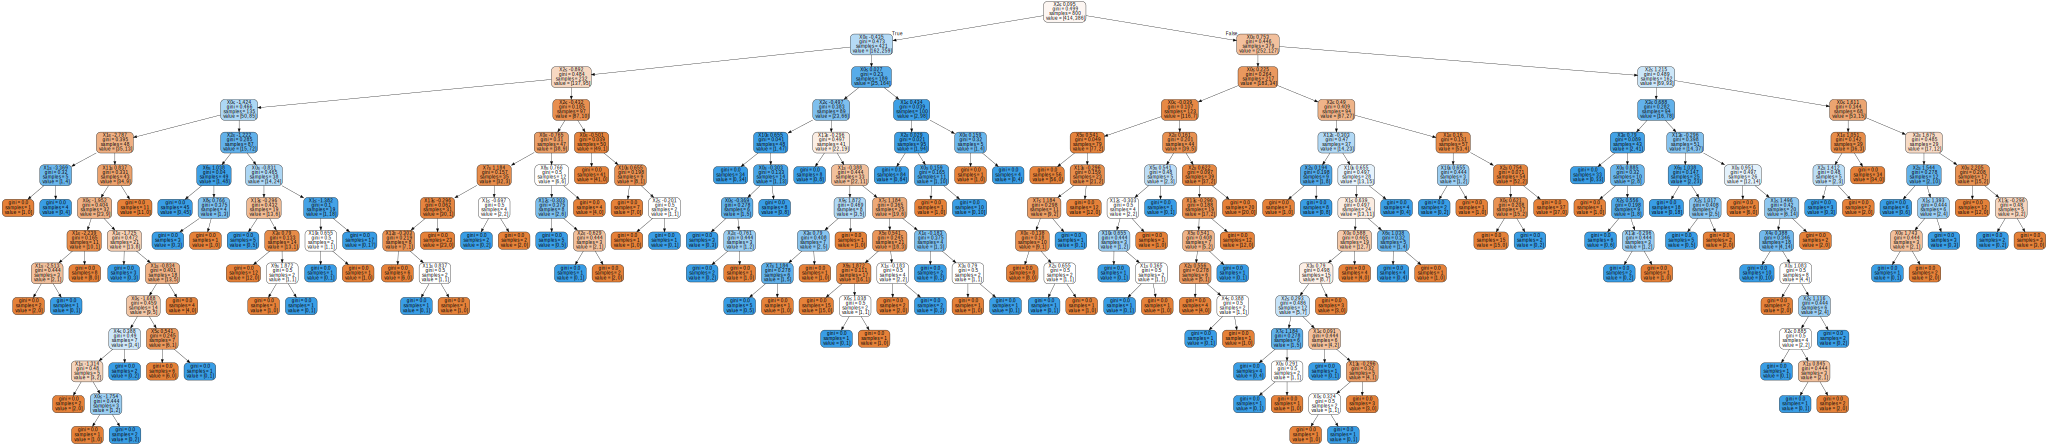

In [117]:
dot_data = tree.export_graphviz(tree_classifier, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph 

При подборе глубины мы каждый раз получаем разные гиперпараметры,а следовательно и качество предсказания. Однако в целом результаты хорошие и находятся примерно на уровне 80-90%.

In [118]:
parameters = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
tree_classifier = tree.DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_classifier, parameters)
tree_grid.fit(X_train, y_train)
y_pred = tree_grid.predict(X_test)

print(tree_grid.best_params_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'max_depth': 4}
[[94 10]
 [30 66]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       104
           1       0.87      0.69      0.77        96

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [119]:
dot_data = tree.export_graphviz(tree_grid.best_estimator_, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph 

Попробуем предсказать пол с помощью алгоритма NB. Результаты совсем не удовлетворительны: 60-70%.

In [120]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68 36]
 [28 68]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       104
           1       0.65      0.71      0.68        96

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Попробуем предсказать пол с помощью алгоритма SVM. Результаты достаточно хорошие: 80-91%.

In [121]:
svm_cl = svm.SVC()
svm_cl.fit(X_train, y_train)
y_pred = svm_cl.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95  9]
 [18 78]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.90      0.81      0.85        96

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Попробуем предсказать пол с помощью алгоритма LR. Результаты оказались самыми лучшими: 85-95%.

In [122]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97  7]
 [11 85]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       104
           1       0.92      0.89      0.90        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [149]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X.take(train_index), X.take(test_index)
  y_train, y_test = y.take(train_index), y.take(test_index)
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\1_USER\Games\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

Пол можно предсказать с точностью около 85-93% с помощью линейной регрессии.